## Load Libarys and Import Data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

#load dataset
spotify_dataset = pd.read_csv("C:\\Users\\Eogan Sullivan\\Desktop\\Spotify Data\\data.csv")
spotify_dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,plays
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,593697544.0
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,422047548.0
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future,41350660.0
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House,12143158.0
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys,3914266.0


In [2]:

spotify_dataset.shape

(2014, 18)

## Remove Data that has null values for plays

In [3]:
modSpot = spotify_dataset.dropna()

In [4]:
modSpot.shape

(255, 18)

## Bar Graph Displaying the plays for the songs

<BarContainer object of 255 artists>

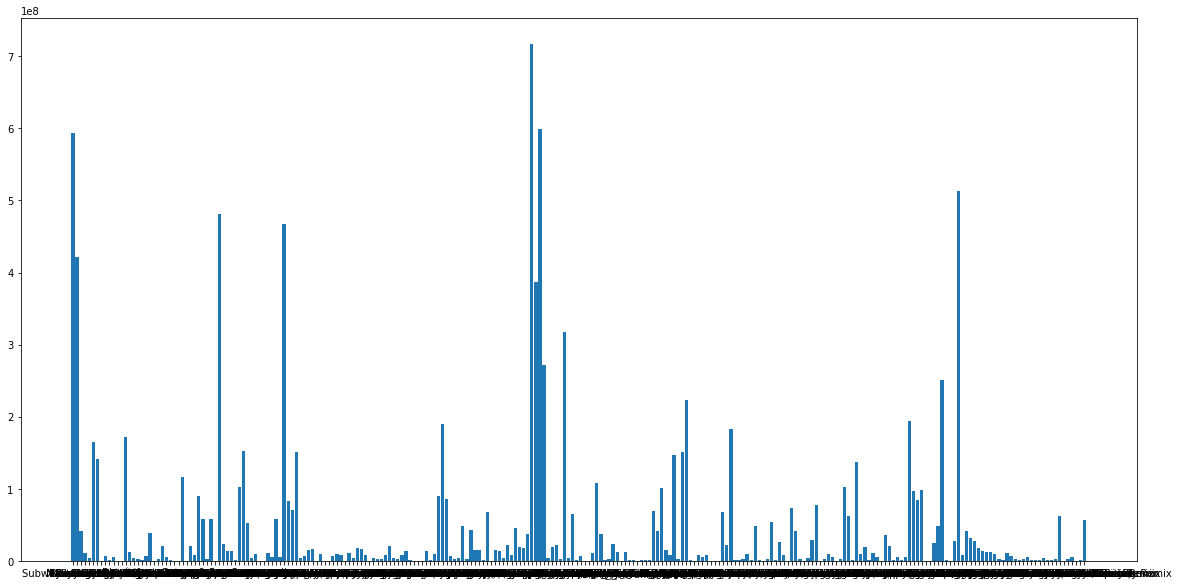

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
x= modSpot["song_title"]
y = modSpot["plays"]
plt.bar(x,y)

## Scatter Plot For Correlation Between Valence and Danceability

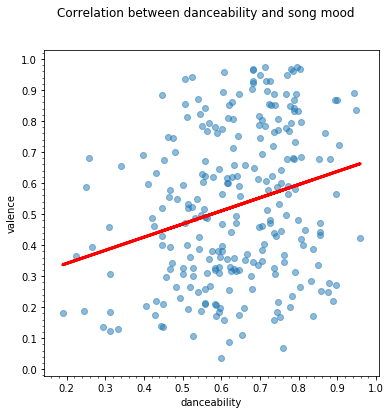

In [6]:
##Correlation between danceability and song "mood"
x = modSpot["danceability"].values
y = modSpot["valence"].values
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()


## Histograms Of Danceability VS Valence
Histogram on the left illustrates the distribution of songs based on their energy levels.The heatmap on the right llustrates the number of songs found at all values of valence and danceability.

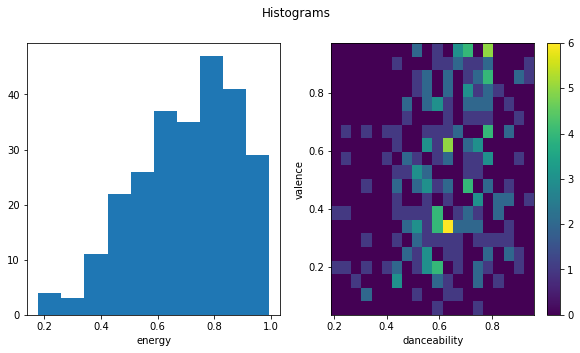

In [7]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(modSpot[x], modSpot[y], bins=20)
ax1.hist(modSpot["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

## 3D Scatter Plot
Using principle component analysis to reduce the dimensions of the dataset to three and create a matrix suitable to generate the following plot.The lesser the distance between any two songs the larger the similarities in their traits

In [8]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness","plays"]
text1 = modSpot["artist"] + " - " + modSpot["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = modSpot[chosen].values
y = modSpot["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")

# 2D scatter plot
using a smaller list of variables with principle component analysis. this graph is used to determine how a song fits in two particular genres pop and rock.

In [9]:
chosen = ["energy", "liveness", "tempo", "valence"]
text1 = modSpot["artist"] + " - " + modSpot["song_title"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = modSpot[chosen].values
y = modSpot["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)

X = pca.transform(X)

fig = {
    "data": [
        {
            "x": X[:, 0],
            "y": X[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "More Similar to Pop Music"},
        "yaxis": {"title": "More Similar to Rock Music"}
    }
}

py.iplot(fig, filename="test-graph2")

## T-SNE PLOT
using T-sne method to plot similarities between the songs and their attributes in the dataset

In [10]:
import time

chosen = ["energy", "liveness", "tempo", "valence", "loudness",
          "speechiness", "acousticness", "danceability", "instrumentalness", "plays"]

X = modSpot[chosen].values
y = modSpot["loudness"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": text2,
            "mode": "markers",
            "marker": {"size": "8", "color": y}
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 255 samples in 0.001s...
[t-SNE] Computed neighbors for 255 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 255 / 255
[t-SNE] Mean sigma: 0.284303
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.026718
[t-SNE] Error after 300 iterations: 0.903078
t-SNE done! Time elapsed: 2.202249765396118 seconds


In [11]:
import graphviz
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [12]:
red_blue = ["#19B5FE", "#EF4836"]
palette = sns.color_palette(red_blue)
sns.set_palette(palette)
sns.set_style("white")
%matplotlib inline

In [13]:
train, test = train_test_split(modSpot, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 178; Test samples: 77


In [14]:
pos_tempo = modSpot[modSpot['target'] == 1]['tempo']
neg_tempo = modSpot[modSpot['target'] == 0]['tempo']
pos_dance = modSpot[modSpot['target'] == 1]['danceability']
neg_dance = modSpot[modSpot['target'] == 0]['danceability']
pos_duration = modSpot[modSpot['target'] == 1]['duration_ms']
neg_duration = modSpot[modSpot['target'] == 0]['duration_ms']
pos_loudness = modSpot[modSpot['target'] == 1]['loudness']
neg_loudness = modSpot[modSpot['target'] == 0]['loudness']
pos_speechiness = modSpot[modSpot['target'] == 1]['speechiness']
neg_speechiness = modSpot[modSpot['target'] == 0]['speechiness']
pos_valence = modSpot[modSpot['target'] == 1]['valence']
neg_valence = modSpot[modSpot['target'] == 0]['valence']
pos_energy = modSpot[modSpot['target'] == 1]['energy']
neg_energy = modSpot[modSpot['target'] == 0]['energy']
pos_acousticness = modSpot[modSpot['target'] == 1]['acousticness']
neg_acousticness = modSpot[modSpot['target'] == 0]['acousticness']
pos_key = modSpot[modSpot['target'] == 1]['key']
neg_key = modSpot[modSpot['target'] == 0]['key']
pos_instrumentalness = modSpot[modSpot['target'] == 1]['instrumentalness']
neg_instrumentalness = modSpot[modSpot['target'] == 0]['instrumentalness']

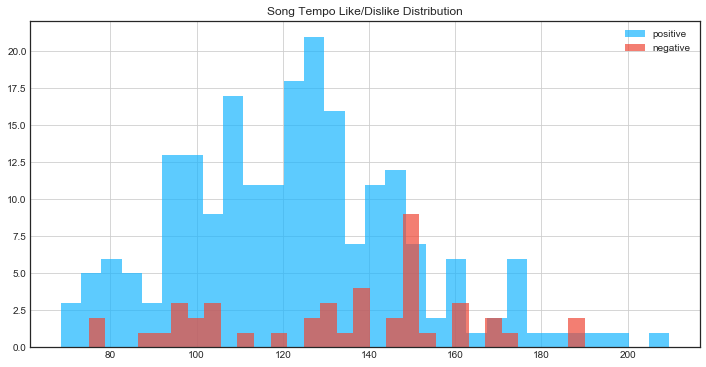

In [15]:
fig = plt.figure(figsize=(12, 6))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

C:\Users\Eogan Sullivan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



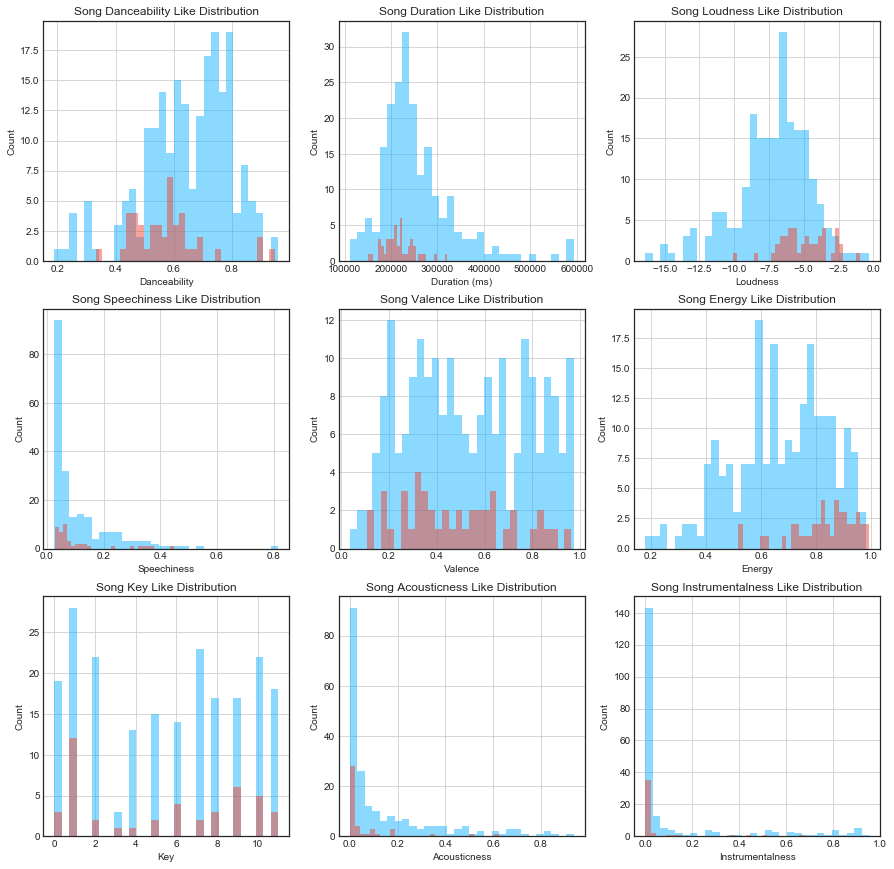

In [16]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)


In [17]:
# Could refine min_samples_split, 
c = tree.DecisionTreeClassifier(min_samples_leaf=20, random_state=10)

In [33]:
features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key","plays"]

X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]

dt = c.fit(X_train, y_train)

In [34]:
y_pred = c.predict(X_test)

In [35]:
hidden_neuron_nums = list(range(15,30))
#[2,3,4,5,6...9, 10, 20, 30, ... 90, 100, 125, 150, 175]
total_performance_records = []
for hn in hidden_neuron_nums:
    c_ = tree.DecisionTreeClassifier(min_samples_leaf=hn, random_state=10)
    perf_records_ = []
    for i in range(10):
         c_.fit(X_train, y_train)
         tst_p_ = c_.predict(X_test)
         performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
         perf_records_.append(performance)
    total_performance_records.append(np.mean(perf_records_))
    print ("Evaluate hidden layer {} done, accuracy {:.2f}".format(
        hn, total_performance_records[-1]))

Evaluate hidden layer 15 done, accuracy 0.78
Evaluate hidden layer 16 done, accuracy 0.78
Evaluate hidden layer 17 done, accuracy 0.79
Evaluate hidden layer 18 done, accuracy 0.83
Evaluate hidden layer 19 done, accuracy 0.83
Evaluate hidden layer 20 done, accuracy 0.83
Evaluate hidden layer 21 done, accuracy 0.83
Evaluate hidden layer 22 done, accuracy 0.83
Evaluate hidden layer 23 done, accuracy 0.83
Evaluate hidden layer 24 done, accuracy 0.83
Evaluate hidden layer 25 done, accuracy 0.83
Evaluate hidden layer 26 done, accuracy 0.83
Evaluate hidden layer 27 done, accuracy 0.83
Evaluate hidden layer 28 done, accuracy 0.83
Evaluate hidden layer 29 done, accuracy 0.83


In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
forest_y_pred = clf.predict(X_test)
score = accuracy_score(y_test, forest_y_pred) * 100
rounded_score = round(score, 1)
print("Random Forest (n_est: 100) Accuracy: {}%".format(rounded_score))

Random Forest (n_est: 100) Accuracy: 84.4%


In [38]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [39]:
# scikit-learn adopts consistent model-construction and training interface, 
# the construction and training of Multi-layer-perceptrons is similar to 
# that of perceptron
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
# Please check the .coefs_ as shown in pre-study video
print(type(mlpc.coefs_))
print(len(mlpc.coefs_))
print(type(mlpc.coefs_[0]))
# Before checking this shape, try to guess it
print(mlpc.coefs_[0].shape)
print(type(mlpc.coefs_[1]))
# Before checking this shape, try to guess it
print(mlpc.coefs_[1].shape)

<class 'list'>
2
<class 'numpy.ndarray'>
(14, 100)
<class 'numpy.ndarray'>
(100, 1)


In [41]:
# Applying the model
tst_preds = mlpc.predict(X_test)

# Computing the accuracy
# "==" represents element-wise comparison
# "sum" counts all "True"'s (True:1, False:0)
# ".size" is the total number of predictions
# "float" prevents the ratio to be rounded
# print (np.sum(tst_preds == y_test) / float(tst_preds.size))
score = accuracy_score(y_test, tst_preds) * 100
rounded_score = round(score, 1)
print("Neural Network Classifier Accuracy: {}%".format(rounded_score))

Neural Network Classifier Accuracy: 16.9%


In [42]:
## Stage - 2.
# Set one parameter-#.hidden layer and compute the AVERAGE performance

hn = 10
mlpc_ = MLPClassifier(hidden_layer_sizes=(hn,))
perf_records_ = []
for i in range(10):  
    mlpc_.fit(X_train, y_train)
    tst_p_ = mlpc_.predict(X_test)
    performance = np.sum(tst_p_ == y_test) / float(tst_p_.size)
    perf_records_.append(performance)

print ("#.Hidden Neurons", hn)
print ("Accuracy", perf_records_)
print ("Avg. Accuracy", np.mean(perf_records_))

#.Hidden Neurons 10
Accuracy [0.8311688311688312, 0.7662337662337663, 0.8181818181818182, 0.8311688311688312, 0.7922077922077922, 0.16883116883116883, 0.8311688311688312, 0.4935064935064935, 0.8311688311688312, 0.2077922077922078]
Avg. Accuracy 0.6571428571428571


In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [44]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
tst_pred = abc.predict(X_test)
print (np.count_nonzero(tst_pred == y_test) / float(y_test.size))

0.7792207792207793


In [45]:
from sklearn.naive_bayes import GaussianNB

features = ["valence", "energy", "danceability", "speechiness", "acousticness", "instrumentalness", "loudness","duration_ms","liveness","tempo","time_signature","mode","key","plays"]

X_train = train[features]
y_train = train["target"]

X_test = test[features]
y_test = test["target"]
clf = GaussianNB()
clf.fit(X_train, y_train)
target_pred = clf.predict(X_test)
accuracy_score(y_test, target_pred, normalize = True)

0.6753246753246753

In [46]:
speaker_df = modSpot.groupby('artist').count().reset_index()[['artist', 'target']]
speaker_df.columns = ['artist', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,artist,appearances
179,WALK THE MOON,10
45,Drake,7
42,Disclosure,6
189,Young Thug,5
119,Nickelback,4
91,Kanye West,4
167,Three 6 Mafia,4
81,ILoveMakonnen,4
61,Fetty Wap,3
33,Crystal Castles,3


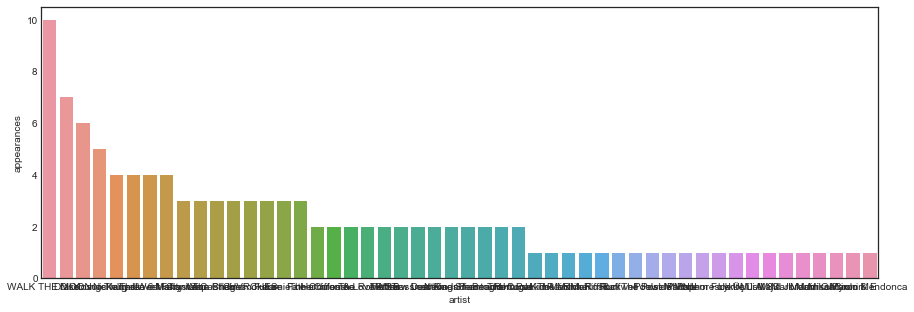

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x='artist', y='appearances', data=speaker_df.head(50))
plt.show()